# Abstract:
Heart disease is easier to treat when it is detected in the early stages. Machine learning techniques may aid a more efficient analysis in the prediction of the disease. Moreover, this prediction is one of the most central problems in medicine, as it is one of the leading diseases related to an unhealthy lifestyle. So, an early prediction of this disease will be useful for a cure or aversion


## Problem Statement:
Analyze the heart disease dataset to explore the machine learning algorithms and build a decision tree model to predict the disease.


## Dataset Information:
Each attribute in the heart disease dataset is a medical risk factor.



## Scope:
●	Understand data by performing exploratory data analysis
●	Training and building Decision Tree classification algorithm to predict if a patient has heart disease
●	Understand feature importances and improve the model
●	Understand various model performance metrics and measure the performance of each model


In [71]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [2]:
df=pd.read_csv("ML DT HEART DISESES.csv")

In [3]:
df.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  303 non-null    int64  
 1   gender               303 non-null    int64  
 2   chest_pain           303 non-null    int64  
 3   rest_bps             303 non-null    int64  
 4   cholestrol           303 non-null    int64  
 5   fasting_blood_sugar  303 non-null    int64  
 6   rest_ecg             303 non-null    int64  
 7   thalach              303 non-null    int64  
 8   exer_angina          303 non-null    int64  
 9   old_peak             303 non-null    float64
 10  slope                303 non-null    int64  
 11  ca                   303 non-null    int64  
 12  thalassemia          303 non-null    int64  
 13  target               303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
gender,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
chest_pain,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
rest_bps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
cholestrol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fasting_blood_sugar,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
rest_ecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exer_angina,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
old_peak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
d = {}

# finding unique counts
for col in list(df.columns):
    
    d[col] = df[col].value_counts().shape[0]

# Converting dict to dataframe
pd.DataFrame(d, index=['Unique Counts']).transpose()

,Unique Counts
age,41
gender,2
chest_pain,4
rest_bps,49
cholestrol,152
fasting_blood_sugar,2
rest_ecg,3
thalach,91
exer_angina,2
old_peak,40


In [7]:
from collections import defaultdict
unique_val = defaultdict(list)

for col in df.columns:
    
    unique_val[col].append(list(df[col].unique()))
    
# Converting dict to dataframe
pd.DataFrame(unique_val, index=['Unique Values']).transpose()

,Unique Values
age,"[63, 37, 41, 56, 57, 44, 52, 54, 48, 49, 64, 5..."
gender,"[1, 0]"
chest_pain,"[3, 2, 1, 0]"
rest_bps,"[145, 130, 120, 140, 172, 150, 110, 135, 160, ..."
cholestrol,"[233, 250, 204, 236, 354, 192, 294, 263, 199, ..."
fasting_blood_sugar,"[1, 0]"
rest_ecg,"[0, 1, 2]"
thalach,"[150, 187, 172, 178, 163, 148, 153, 173, 162, ..."
exer_angina,"[0, 1]"
old_peak,"[2.3, 3.5, 1.4, 0.8, 0.6, 0.4, 1.3, 0.0, 0.5, ..."


In [8]:
cat_features = ['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia']

cont_features = ['age', 'rest_bps', 'cholestrol', 'thalach', 'old_peak']

target_var = ['target']

print('Categorical Features are : ', cat_features)

print('Continuous Features are : ', cont_features)

print('Target is : ', target_var)

Categorical Features are :  ['gender', 'chest_pain', 'fasting_blood_sugar', 'rest_ecg', 'exer_angina', 'slope', 'ca', 'thalassemia']
Continuous Features are :  ['age', 'rest_bps', 'cholestrol', 'thalach', 'old_peak']
Target is :  ['target']


In [9]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

In [10]:
df.shape

(303, 14)

## EDA

<Figure size 576x396 with 0 Axes>

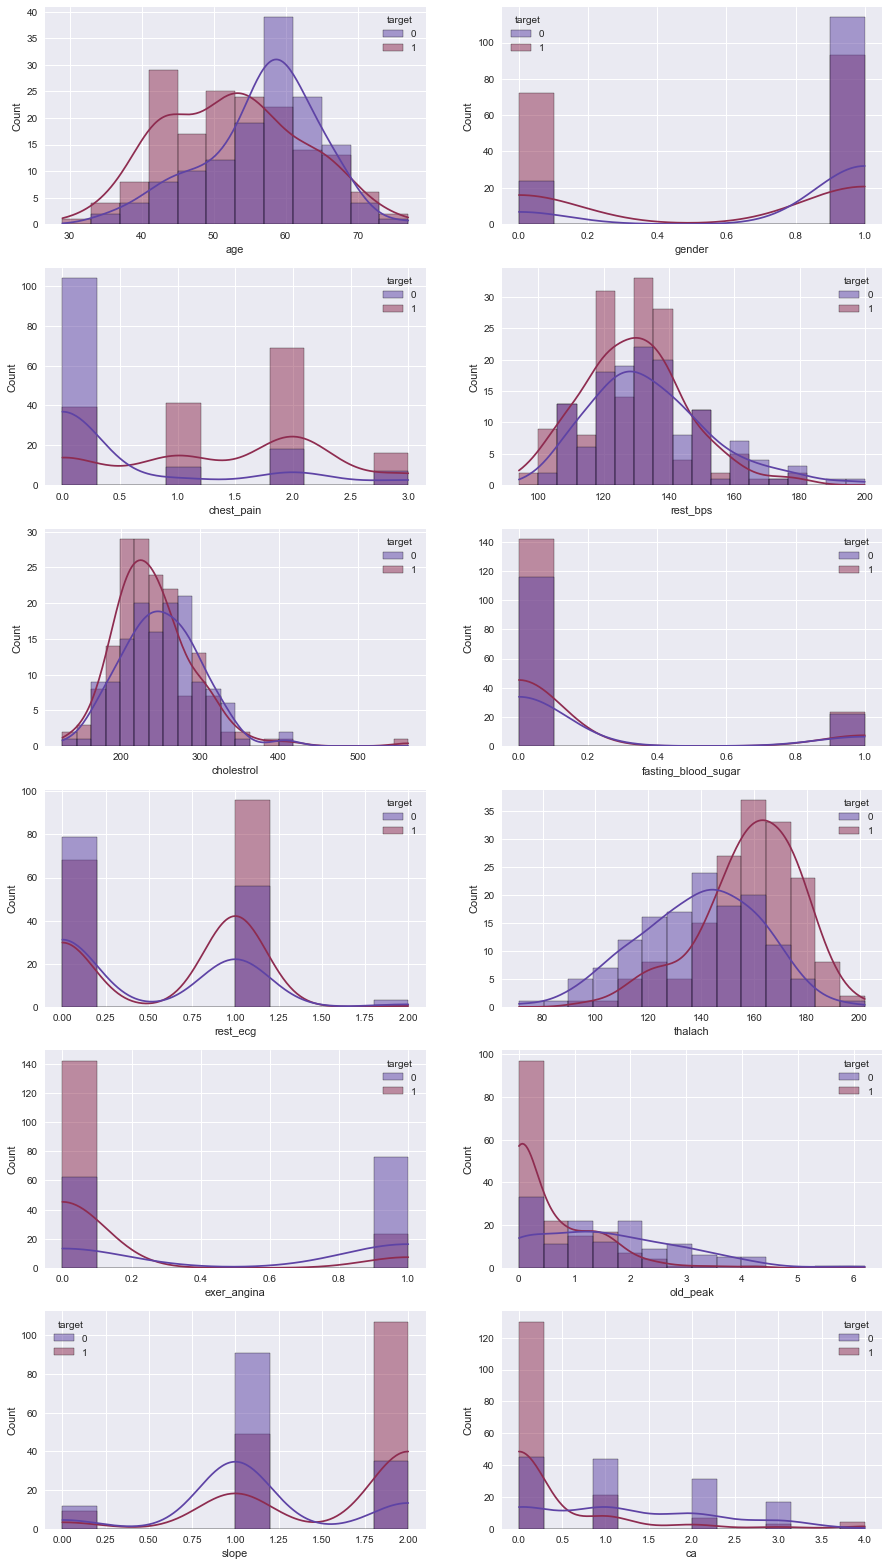

In [11]:
plt.style.use("seaborn")
plt.subplots_adjust(hspace=0.2)
color = 'twilight'

fig, axs = plt.subplots(6, 2, figsize=(15,28))
i=1
for feature in df.columns:
    if feature not in ["target"] and i < 13:
        plt.subplot(6,2,i)
        sns.histplot(data=df, x=feature, kde=True, palette=color, hue='target')
        i+=1

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


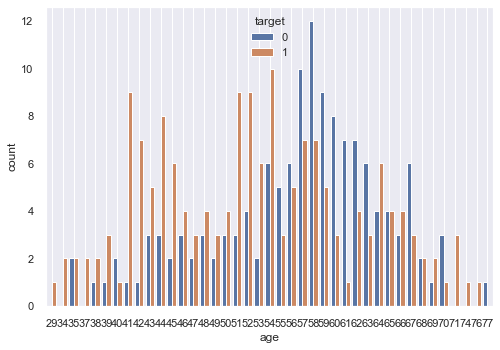

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


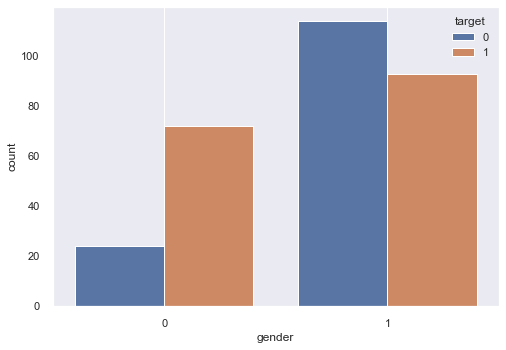

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


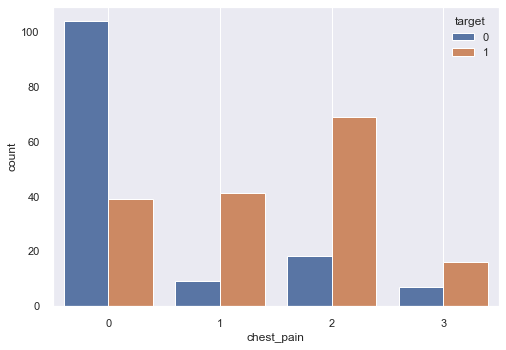

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


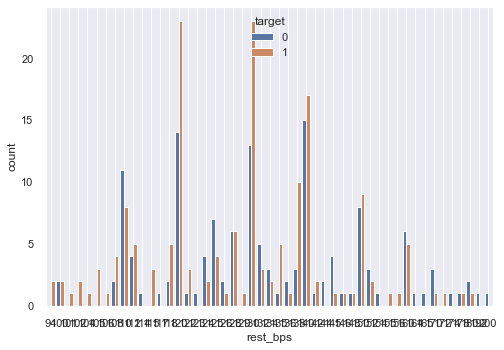

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


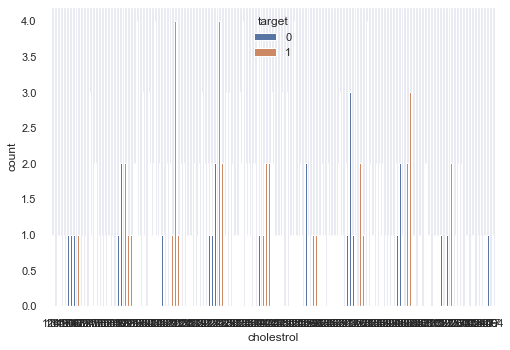

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


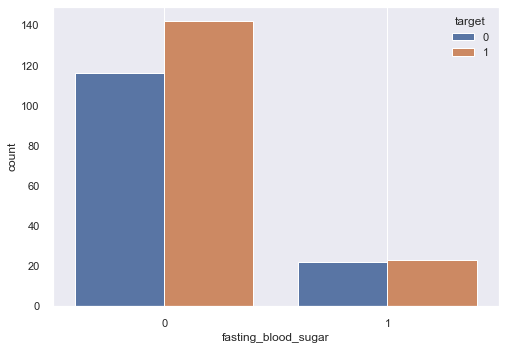

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


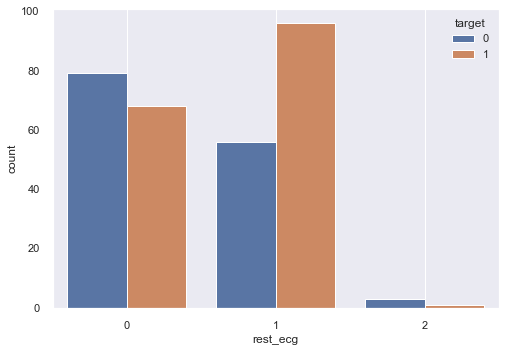

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


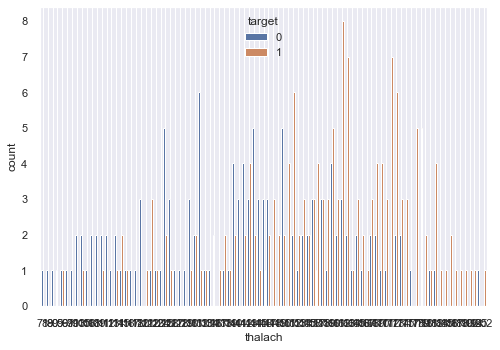

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


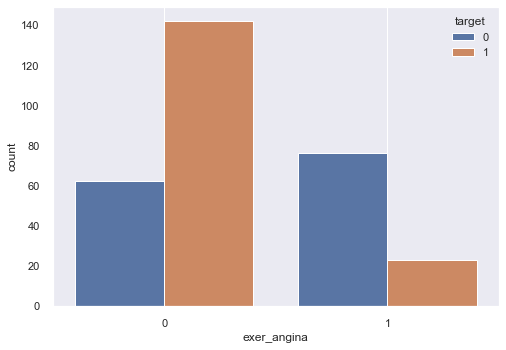

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


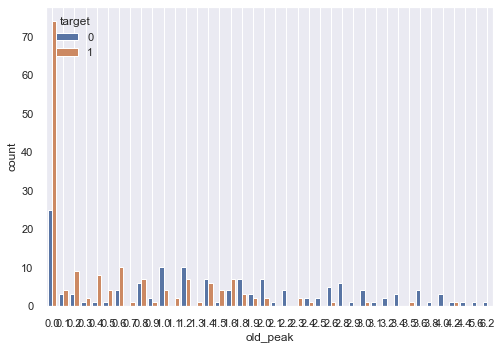

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


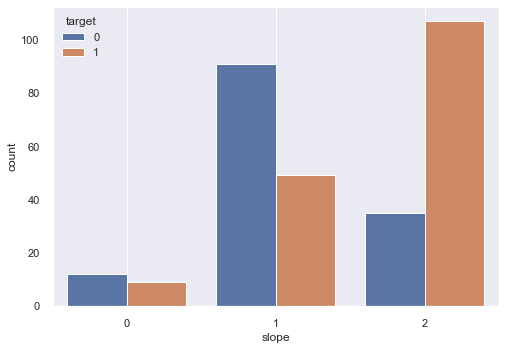

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


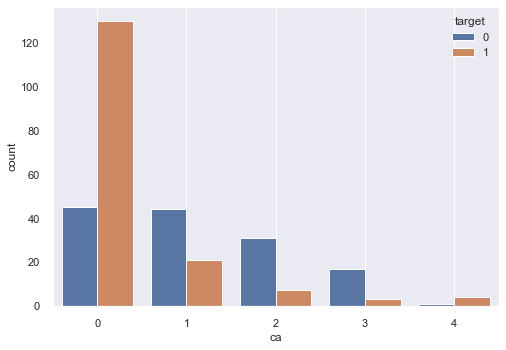

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


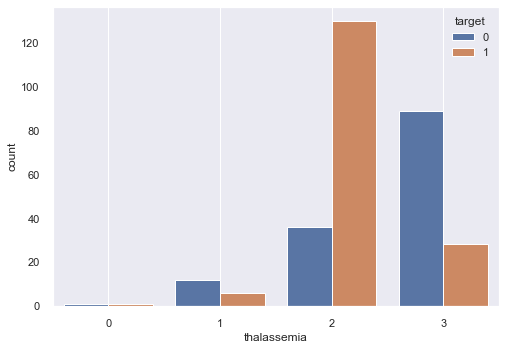

In [12]:
cols=['age','gender','chest_pain','rest_bps','cholestrol','fasting_blood_sugar','rest_ecg','thalach',
      'exer_angina','old_peak','slope','ca','thalassemia']
for i in cols:
    sns.set(style="darkgrid")
    sns.countplot(df[i],hue=df['target'])
    plt.grid()
    plt.show()

Observations:
Data contains twice the number of people with sex = 1 than sex = 0 More data available with fasting_blood_sugar <= 120 mg/dl 33% people have exercise induced angina (pain in the chest that comes on with exercise)

######  Visulaizing Continuos Features

<AxesSubplot:>

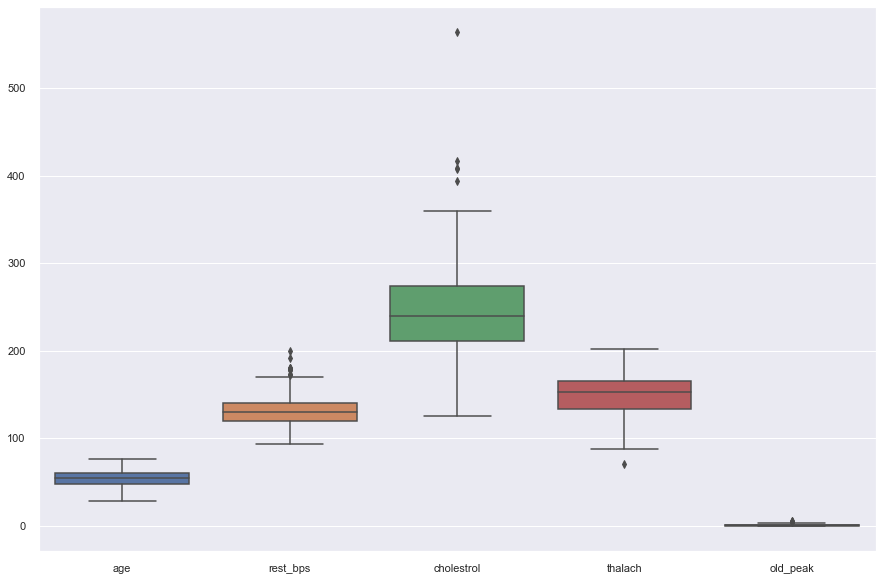

In [13]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df[['age','rest_bps', 'cholestrol', 'thalach', 'old_peak']], orient='v')

In [14]:
df['target'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: target, dtype: float64

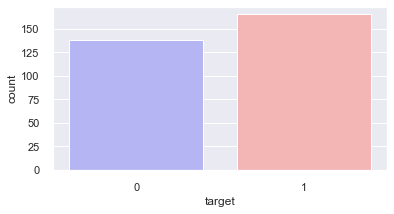

In [15]:
plt.figure(figsize=(6,3))
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

No class imbalance

#### Bivariate Analysis & Visualization

<AxesSubplot:xlabel='gender', ylabel='age'>

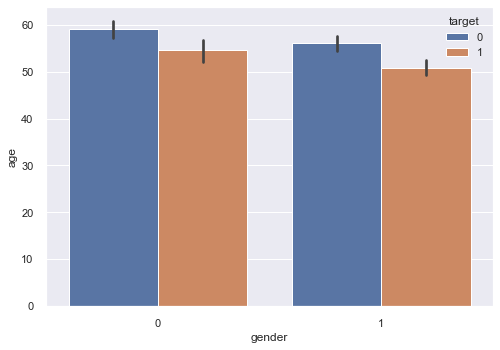

In [16]:
sns.barplot(x='gender', y='age', data=df, hue='target')

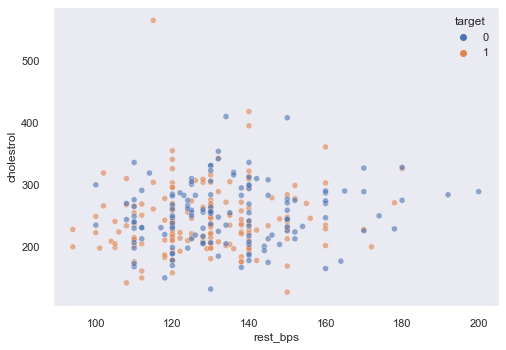

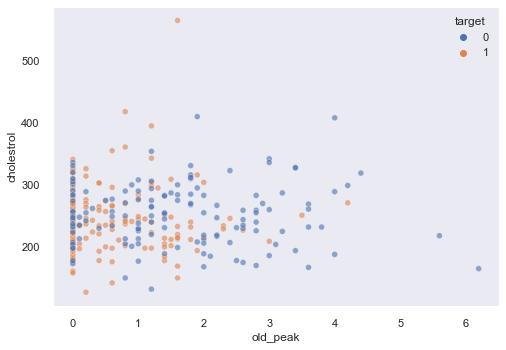

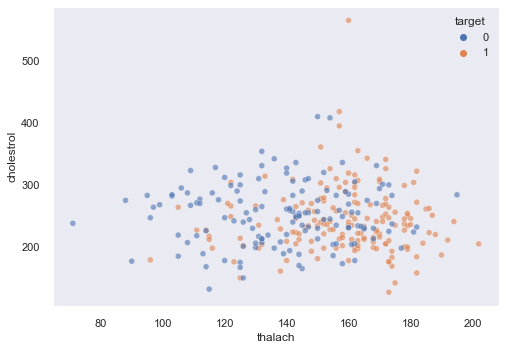

In [17]:
cols=['rest_bps','old_peak','thalach',]
for i in cols:
    sns.set(style="darkgrid")
    sns.scatterplot(x=i,y='cholestrol',data=df,hue='target',alpha=0.6)
    plt.grid()
    plt.show()

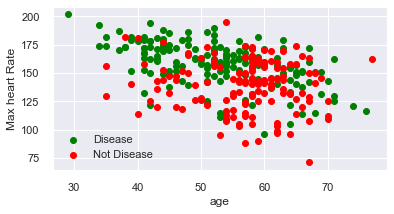

In [18]:
plt.figure(figsize=(6,3))
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="green")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)],c="red")
plt.legend(["Disease", "Not Disease"])
plt.xlabel("age")
plt.ylabel("Max heart Rate")

plt.show()

<Figure size 288x144 with 0 Axes>

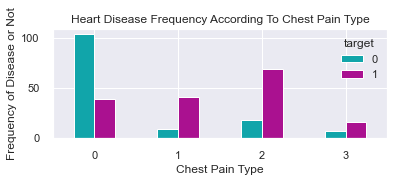

In [19]:
plt.figure(figsize=(4,2))
pd.crosstab(df.chest_pain,df.target).plot(kind="bar",figsize=(6,2),color=['#11A5AA','#AA1190' ])
plt.title('Heart Disease Frequency According To Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.xticks(rotation = 0)
plt.ylabel('Frequency of Disease or Not')
plt.show()

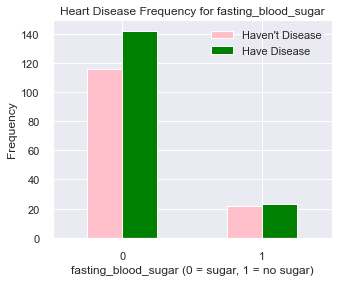

In [20]:
pd.crosstab(df.fasting_blood_sugar,df.target).plot(kind="bar",figsize=(5,4),color=['pink','green' ])
plt.title('Heart Disease Frequency for fasting_blood_sugar')
plt.xlabel('fasting_blood_sugar (0 = sugar, 1 = no sugar)')
plt.xticks(rotation=0)
plt.legend(["Haven't Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

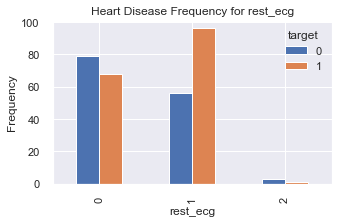

In [21]:
pd.crosstab(df.rest_ecg,df.target).plot(kind="bar",figsize=(5,3))
plt.title('Heart Disease Frequency for rest_ecg')
plt.xlabel('rest_ecg')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndrest_ecg.png')
plt.show()

In [22]:
df1=df[['rest_bps','cholestrol','thalach','age','old_peak','target']]

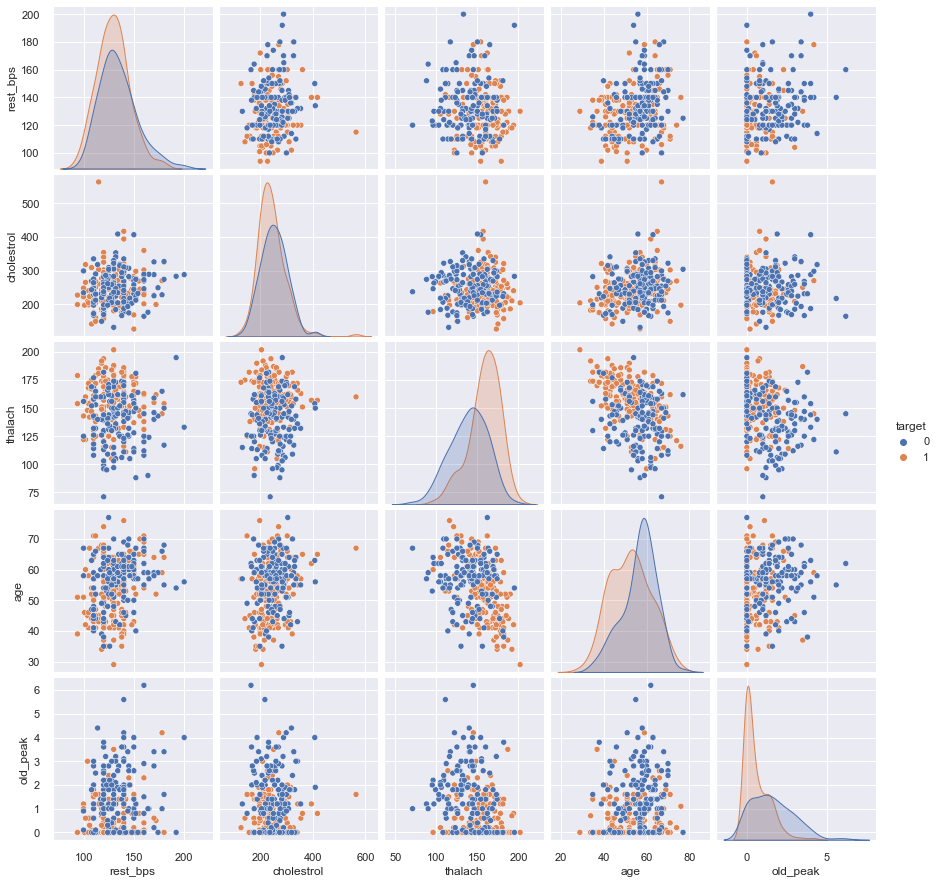

In [23]:
sns.pairplot(df1, hue='target');

In [24]:
correlation=df.corr()
correlation

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
gender,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
chest_pain,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
rest_bps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
cholestrol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fasting_blood_sugar,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
rest_ecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exer_angina,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
old_peak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

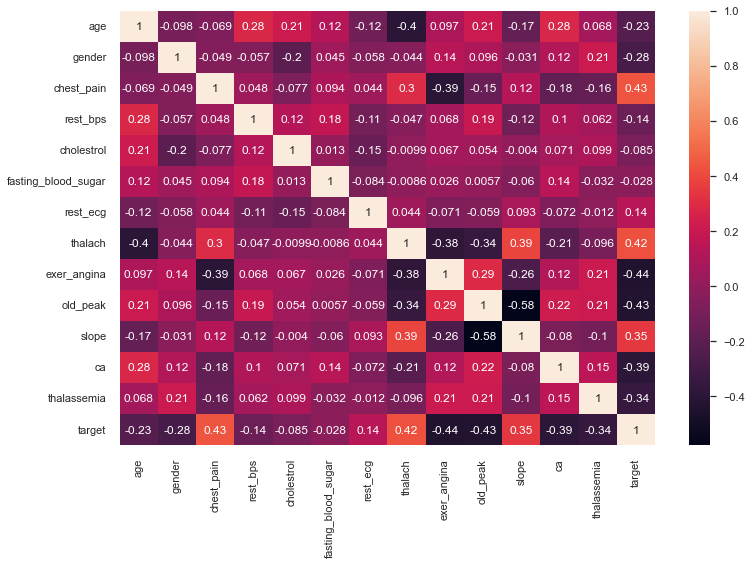

In [25]:
plt.figure(figsize=(12,8))
sns.heatmap(correlation,annot=True)

Observations: There is no linear correlation between continuous variable according to the heatmap

### Extracting the target column into separate vectors for training set and test set

In [26]:
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [27]:
x=df.drop(['target'],axis=1)
y=df[['target']]

In [ ]:
# Splitting data into training and test set

In [28]:
# Train test Split (70:30)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)

In [ ]:
# Building a Decision_Tree classifier

In [29]:
dt_model=DecisionTreeClassifier()

In [30]:
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [31]:
x_train.shape

(212, 13)

In [32]:
y_train.shape

(212, 1)

In [33]:
dt_model.score(x_train,y_train)

1.0

In [34]:
dt_model.score(x_test,y_test)

0.7142857142857143

In [35]:
from sklearn import tree

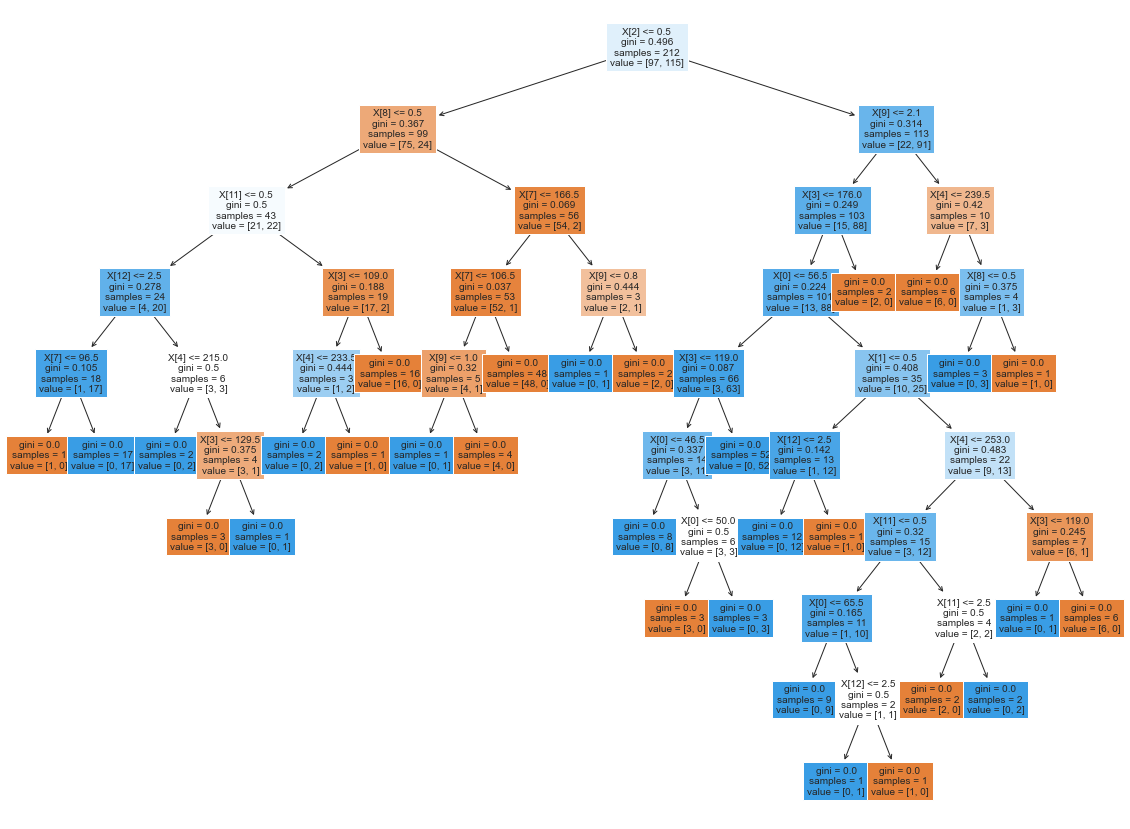

In [36]:
plt.figure(figsize=(20,15))
tree.plot_tree(dt_model,filled=True,fontsize=10);

In [37]:
"""train_char_label=['No','Yes']
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(dt_model, out_file= ld_tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data"""

"train_char_label=['No','Yes']\nld_tree_regularized = open('ld_tree_regularized.dot','w')\ndot_data = tree.export_graphviz(dt_model, out_file= ld_tree_regularized , feature_names = list(x_train), class_names = list(train_char_label))\n\nld_tree_regularized.close()\ndot_data"

### This is an overfitted model. Model requires regulariztion

## Grid_Search_CV

In [38]:
from sklearn.model_selection import GridSearchCV

In [55]:
grid={'max_depth':[7],
      'max_features':[5],
     'min_samples_split':[50],
     'min_samples_leaf':[19]}

In [56]:
model=DecisionTreeClassifier(random_state=1)
grid_search=GridSearchCV(estimator=model,param_grid=grid,cv=5,n_jobs=-1)

In [57]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [7], 'max_features': [5],
                         'min_samples_leaf': [19], 'min_samples_split': [50]})

In [58]:
grid_search.best_params_

{'max_depth': 7,
 'max_features': 5,
 'min_samples_leaf': 19,
 'min_samples_split': 50}

In [59]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=7, max_features=5, min_samples_leaf=19,
                       min_samples_split=50, random_state=1)

In [60]:
best_model=grid_search.best_estimator_

In [61]:
best_model.score(x_train,y_train)

0.7688679245283019

In [62]:
best_model.score(x_test,y_test)

0.7582417582417582

In [63]:
best_model.feature_importances_

array([0.        , 0.0987446 , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.61987221, 0.08191302,
       0.        , 0.        , 0.19947018])

In [64]:
print (pd.DataFrame(best_model.feature_importances_, columns = ["Imp"],
                    index = x_train.columns).sort_values('Imp',ascending=False))

                          Imp
exer_angina          0.619872
thalassemia          0.199470
gender               0.098745
old_peak             0.081913
age                  0.000000
chest_pain           0.000000
rest_bps             0.000000
cholestrol           0.000000
fasting_blood_sugar  0.000000
rest_ecg             0.000000
thalach              0.000000
slope                0.000000
ca                   0.000000


In [65]:
ytrain_predict=best_model.predict(x_train)
ytest_predict=best_model.predict(x_test)


In [66]:
from sklearn.metrics import confusion_matrix, classification_report

<AxesSubplot:>

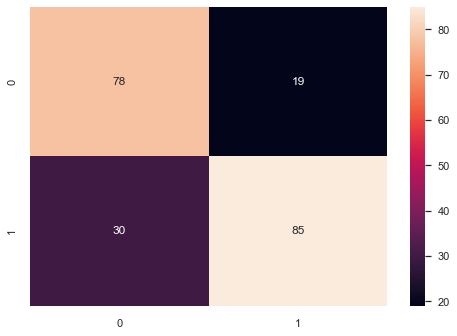

In [67]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict),annot=True,fmt='g')

In [68]:
print(classification_report(y_train,ytrain_predict))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76        97
           1       0.82      0.74      0.78       115

    accuracy                           0.77       212
   macro avg       0.77      0.77      0.77       212
weighted avg       0.77      0.77      0.77       212



<AxesSubplot:>

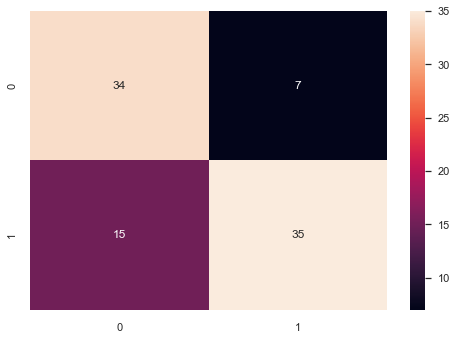

In [69]:
sns.heatmap(confusion_matrix(y_test,ytest_predict),annot=True,fmt='g')

In [70]:
print(classification_report(y_test,ytest_predict))

              precision    recall  f1-score   support

           0       0.69      0.83      0.76        41
           1       0.83      0.70      0.76        50

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.76      0.76        91



### Regularising the Decision Tree

In [73]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', 
                                      max_depth = 7,min_samples_leaf=19,min_samples_split=50, random_state=1)

reg_dt_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=19, min_samples_split=50,
                       random_state=1)

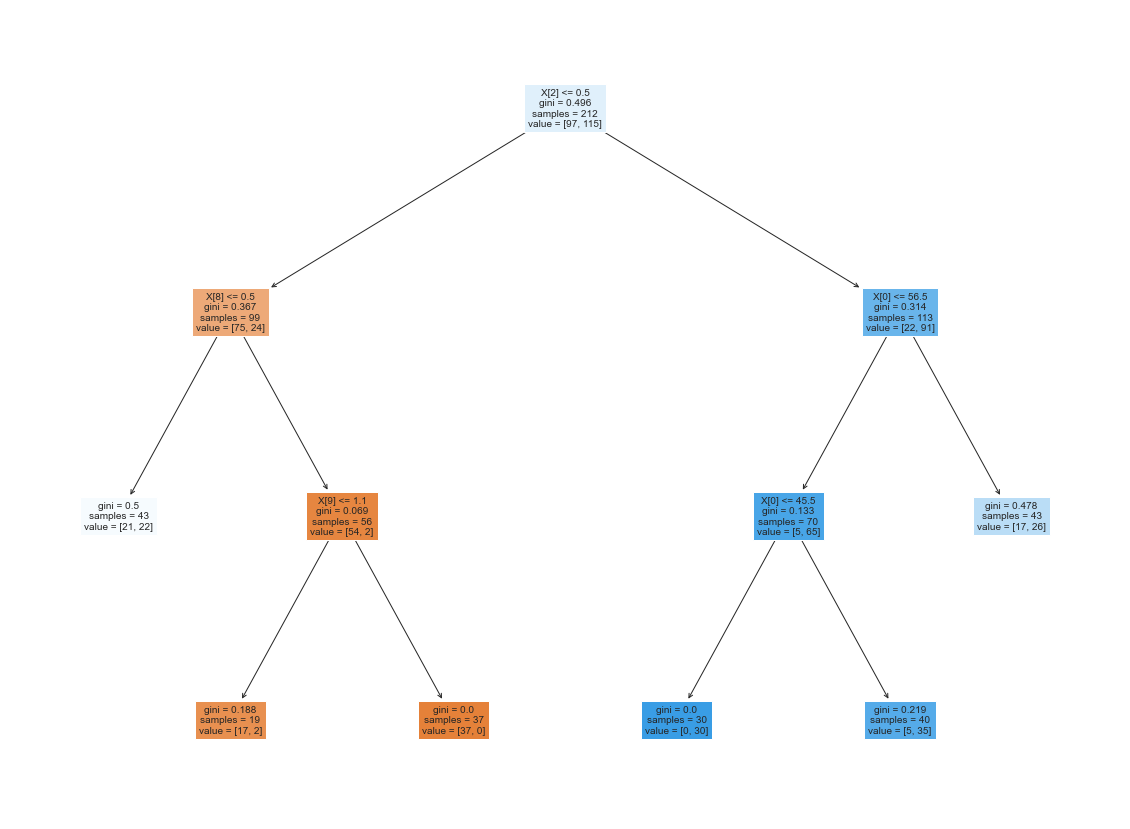

In [75]:
plt.figure(figsize=(20,15))
tree.plot_tree(reg_dt_model,filled=True,fontsize=10);